# به نام خدا

علیرضا توکلی

۸۱۰۱۹۷۶۸۶

پروژه‌ی صفر هوش مصنوعی
آشنایی با هوش مصنوعی

### هدف

هدف از انجام این پروژه پیش‌بینی کلیک کردن یا نکردن کاربران سایت با توجه به ویژگی‌های هر کاربر است. به طور دقیق‌تر هدف این پروژه پر کردن نواقص دیتاست داده شده با پیش‌بینی آن‌ها به کمک تحلیل آماری است.

### توضیح کلی
در این پروژه دیتاستی به ما داده می‌شود که هر سطر آن ویژگی‌های کاربران وجود دارد و در ستون آخر، کلیک کردن یا نکردن کاربر بر روی تبلیغ را نشان می‌دهد. بعضی از سطر‌ها ستون آخرشان خالی است که نشان‌دهنده‌ی این است که ما باید آن‌ها را پر کنیم. این پروژه قدم‌های مختلفی از جمله بررسی دیتاست، تبدیل ستون‌های نوعی به عددی، پر کردن مقادیر خالی و ... را شامل می‌شود.

### دیتاهای این پروژه
در این پروژه تنها دیتای داده شده به منظور تکمیل ستون هدف وجود دارد که با نام df موجود است.

## قسمت اول

### هدف این قسمت
هدف از انجام این بخش وارد کردن دیتا و بررسی کلی دیتا است.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('advertising_dataset.csv', index_col=0)
df.head(7)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,2016-03-27 00:53:11,0.0
1,80.23,31.0,68441.85,NaN,Monitored national standardization,West Jodi,Male,Nauru,2016-04-04 01:39:02,0.0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,2016-03-13 20:35:42,0.0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,2016-01-10 02:31:19,0.0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,2016-06-03 03:36:18,0.0
5,59.99,23.0,59761.56,226.74,Sharable client-driven software,Jamieberg,Male,Norway,2016-05-19 14:30:17,0.0
6,88.91,33.0,53852.85,208.36,Enhanced dedicated support,Brandonstad,Female,Myanmar,2016-01-28 20:59:32,0.0


همان‌طور که مشاهده می‌کنید، داده‌ی ما از یک ستون ایندکس، ۹ ستون ویژگی و در آخر نیز ستون جواب وجود دارد.
بعضی از ستون‌ها مقادیر خالی دارند. تعدادی از ستون‌ها نیز مقادیرشان مقادیر عددی نیستند.

In [4]:
df.tail(7)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
993,64.20,27.0,66200.96,227.63,Phased zero tolerance extranet,Edwardsmouth,Male,Isle of Man,2016-02-11 23:45:01,0.0
994,43.70,28.0,63126.96,173.01,Front-line bifurcated ability,Nicholasland,Female,Mayotte,2016-04-04 03:57:48,1.0
995,72.97,30.0,71384.57,208.58,Fundamental modular algorithm,Duffystad,Male,Lebanon,2016-02-11 21:49:00,1.0
996,51.30,45.0,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,Male,Bosnia and Herzegovina,2016-04-22 02:07:01,1.0
997,51.63,51.0,42415.72,120.37,Expanded intangible solution,South Jessica,Male,Mongolia,2016-02-01 17:24:57,1.0
998,55.55,19.0,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,Female,Guatemala,2016-03-24 02:35:54,0.0
999,NaN,26.0,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,Female,Brazil,2016-06-03 21:43:21,1.0


به طور مشابه برای انتهای این داده نیز شرایط گفته شده وجود دارد. ستون هدف را می‌بینیم که مقادیر ۰ و ۱ دارند که نشان‌دهنده‌ی عدم کلیک و کلیک فرد بر روی تبلیغ است.

In [5]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
count,907.000000,979.000000,1000.000000,913.000000,832.000000
mean,64.794818,36.009193,55000.000080,179.751271,0.496394
std,15.954841,8.783636,13414.634022,43.957934,0.500288
min,32.600000,19.000000,13996.500000,104.780000,0.000000
25%,50.615000,29.000000,47031.802500,138.550000,0.000000
50%,67.940000,35.000000,57012.300000,183.480000,0.000000
75%,78.555000,42.000000,65470.635000,217.850000,1.000000
max,91.430000,61.000000,79484.800000,269.960000,1.000000


این تابع به ازای ستون‌های عددی داده اطلاعاتی به ما می‌دهد. یکی از نکاتی که قابل مشاهده است، تعداد مقادیر برای هر ستون است که ۱۰۰۰ نبودن آن‌ها حاکی از آن است که تعدادی از این مقادیر خالی است.

کاربران به احتمال ۱/۲ روی تبلیغ کلیک می‌کنند. مقادیر درآمد عددهای بزرگ‌تری نسبت به بقیه ستون‌ها هستند و دارای پراکندگی بسیاری می‌باشد.

## قسمت دوم

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  907 non-null    float64
 1   Age                       979 non-null    float64
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      913 non-null    float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Gender                    1000 non-null   object 
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             832 non-null    float64
dtypes: float64(5), object(5)
memory usage: 85.9+ KB


در این بخش اطلاعاتی از نوع هر ستون و تعداد مقادیر غیر خالی هر کدام نشان داده می‌شود.

In [7]:
featureName = 'Gender'
df.loc[df[featureName] == 'Male', featureName] = 1
df.loc[df[featureName] == 'Female', featureName] = 0
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0.0
1,80.23,31.0,68441.85,NaN,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0.0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0.0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0.0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0.0


## قسمت سوم

### هدف این قسمت
هدف از انجام این قسمت پر کردن ستون‌های غیرهدف خالی است. آن‌ها را می‌توان با روش‌های مختلفی پر کرد که در این بخش ما از میانگین هر ستون استفاده می‌کنیم.

In [8]:
df.isna().sum()

Daily Time Spent on Site     93
Age                          21
Area Income                   0
Daily Internet Usage         87
Ad Topic Line                 0
City                          0
Gender                        0
Country                       0
Timestamp                     0
Clicked on Ad               168
dtype: int64

همان‌طور که مشاهده می‌کنید، تابع ابتدایی به ازای هر خانه به ما می‌گوید که آیا این خانه مقدار دارد یا نه. اگر ما همه‌ی این مقادیر را به ازای ستون‌های مختلف جمع کنیم، به تعداد مقادیر خالی هر ستون می‌رسیم.

In [9]:
nanColumns = ['Daily Time Spent on Site', 'Age', 'Daily Internet Usage']
for feature in nanColumns:
    df.loc[df[feature].isna(), feature] = df[feature].sum() / df[feature].count()
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.090000,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0.0
1,80.23,31.0,68441.85,179.751271,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0.0
2,69.47,26.0,59785.94,236.500000,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0.0
3,74.15,29.0,54806.18,245.890000,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0.0
4,68.37,35.0,73889.99,225.580000,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0.0


In [10]:
df.isna().sum()

Daily Time Spent on Site      0
Age                           0
Area Income                   0
Daily Internet Usage          0
Ad Topic Line                 0
City                          0
Gender                        0
Country                       0
Timestamp                     0
Clicked on Ad               168
dtype: int64

همان‌طور که می‌بینید به جز ستون هدف، بقیه ستون‌ها مقدار خالی ندارند.

روش دیگر روش

propagation

است که در این روش به ازای هر خانه‌ی خالی خانه‌ی بعدی یا قبلی را می‌گذاریم. بدی این روش این است که اگر داده‌های قبلی خیلی بزرگ باشند و نویز باشند، در این روش این نویز تشخیص داده نمی‌شود.

با نام‌های ffill, bfill نیز شناخته می‌شوند.

## قسمت چهارم

### هدف این قسمت
هدف از انجام این قسمت بررسی میزان کلیک کردن کاربران به صورت آماری است.

In [11]:
print("Men count:", df['Gender'].sum())
print("Female count:", len(df.loc[df['Gender'] == 0].index))

Men count: 481
Female count: 519


In [12]:
print("Click count:", df['Clicked on Ad'].sum())
print("Not Click count:", len(df.loc[df['Clicked on Ad'] == 0].index))

Click count: 413.0
Not Click count: 419


## قسمت پنجم

In [13]:
print("Older than me and same sex:", len(df.loc[(df['Gender'] == 1) & (df['Age'] > 20)].index))

Older than me and same sex: 472


## قسمت ششم

### هدف این قسمت
هدف از انجام این قسمت و قسمت بعدی، بررسی عمل‌کرد وکتوریزشن و حلقه می‌باشد.

In [14]:
import time

In [15]:
tic = time.time()
print("Average age for users that clicked:", df.loc[df['Clicked on Ad'] == 1, 'Age'].mean())
print("Average age for users that didn't clicked:", df.loc[df['Clicked on Ad'] == 0, 'Age'].mean())
toc = time.time()
print("Time taken:", (toc - tic) * 1000, "ms")

Average age for users that clicked: 40.295599848637366
Average age for users that didn't clicked: 31.723325881701896
Time taken: 1.4786720275878906 ms


## قسمت هفتم

In [16]:
clickedAge = 0
clickedCount = 0
notClickedAge = 0
notClickedCount = 0
tic = time.time()
for i in range(len(df)):
    if df.iloc[i]['Clicked on Ad'] == 0:
        notClickedAge += df.iloc[i]['Age']
        notClickedCount += 1
    elif df.iloc[i]['Clicked on Ad'] == 1:
        clickedAge += df.iloc[i]['Age']
        clickedCount += 1
        
toc = time.time()
print("Average age for users that clicked:", clickedAge / clickedCount)
print("Average age for users that didn't click:", notClickedAge / notClickedCount)
print("Time taken:", (toc - tic) * 1000, "ms")

Average age for users that clicked: 40.295599848637366
Average age for users that didn't click: 31.723325881701896
Time taken: 196.76637649536133 ms


همان‌طور که قابل مشاهده است، زمان قسمت هفتم بسیار بسیار زیادتر و به طور دقیق ۱۲۶ برابر بیش‌تر شده است.

## قسمت هشتم

### هدف این قسمت
هدف از انجام این قسمت بررسی و مشاهده‌ی داده‌های عددی به صورت نمودار است.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f615c2f1220>,
      dtype=object)

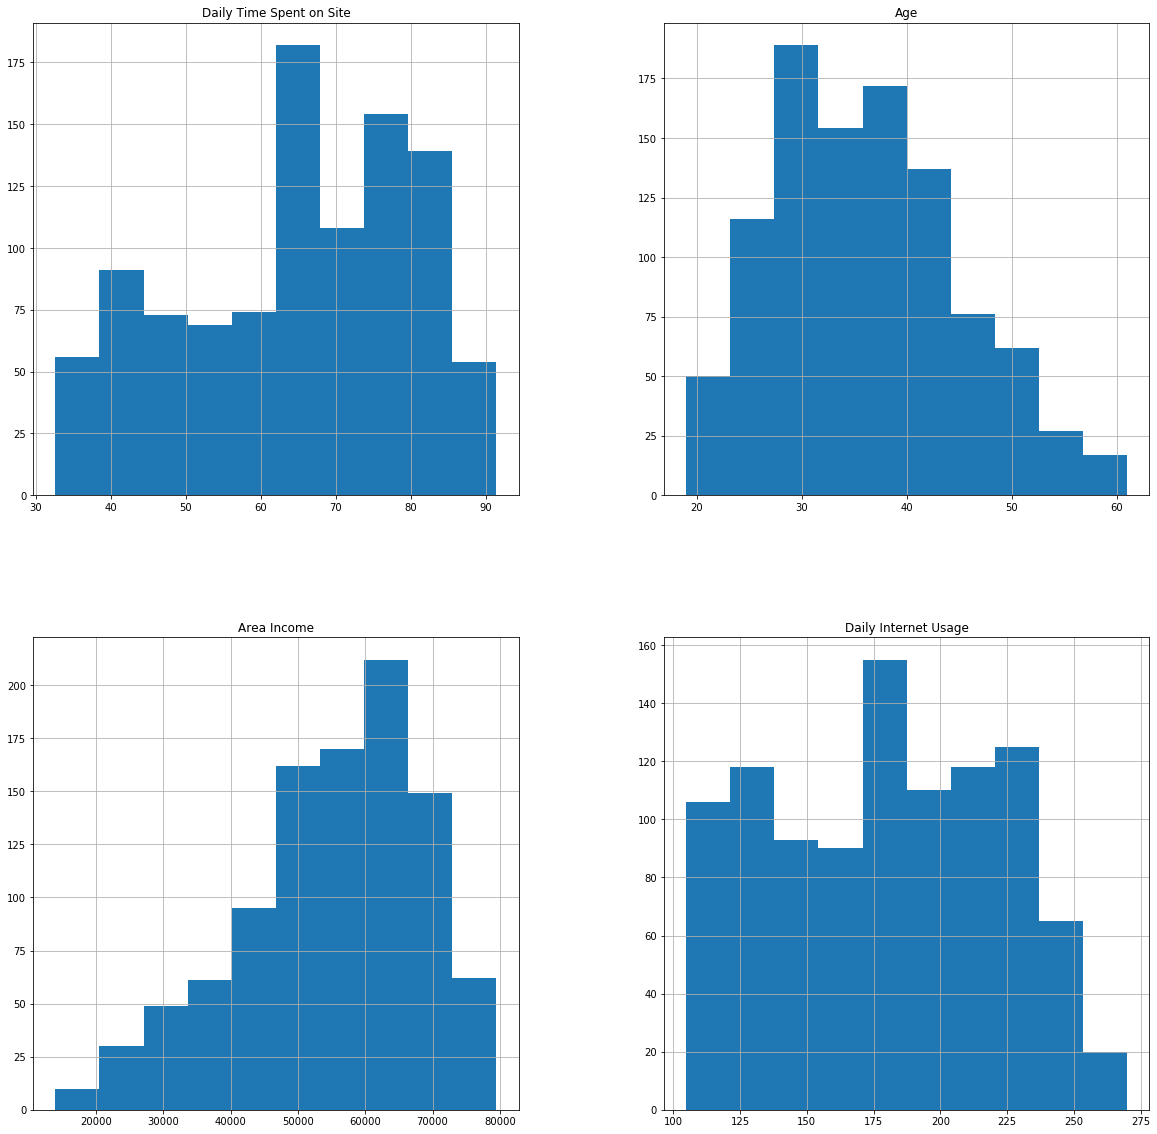

In [17]:
columns = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']
df.hist(column=columns, figsize=(20, 20))

## قسمت نهم

### هدف این قسمت
هدف از انجام این قسمت نرمال کردن داده‌های عددی به منظور بهبود یادگیری ماشین است.

می‌دانیم که نرمال کردن داده‌ها معادل با کم‌کردن هر کدام آن‌ها از میانگین و تقسیم کردن‌شان بر انحراف معیار است.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f61577f76a0>,
      dtype=object)

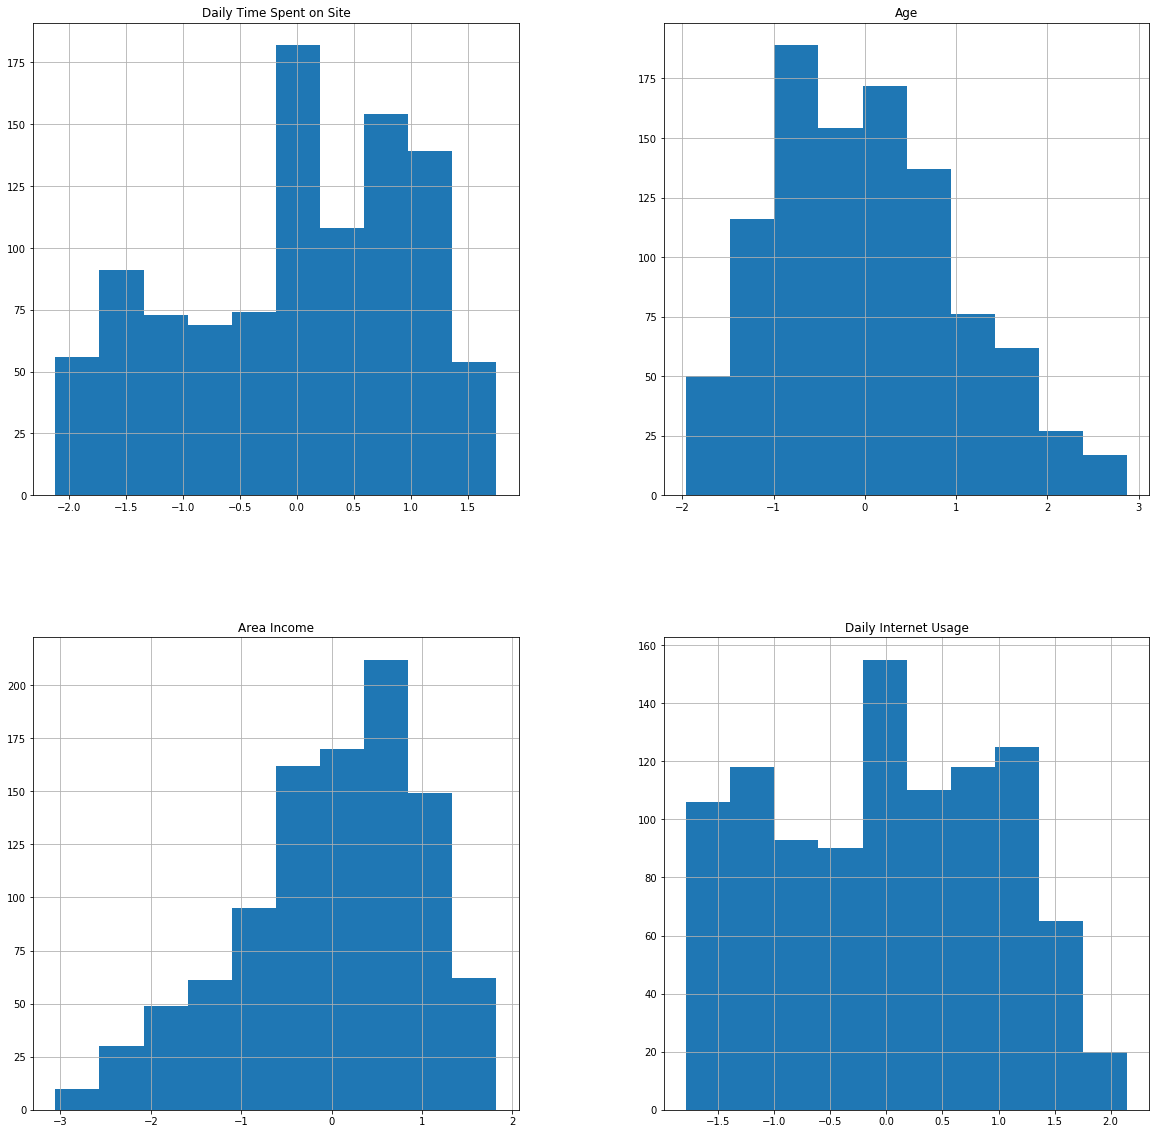

In [18]:
for feature in columns:
    df[feature] = np.divide(np.subtract(df[feature], df[feature].mean()), df[feature].std())
df.hist(column=columns, figsize=(20, 20))

همان‌طور که مشاهده می‌کنید در همه‌ی نمودار‌ها میانگین داده‌ها به صفر رسیده و فرم توزیع نرمال گرفته‌اند.

## قسمت دهم

### هدف این قسمت
هدف از انجام این قسمت بررسی هر کدام از داده‌های عددی و پیدا کردن ویژگی بهتر برای پیش‌بینی داده‌های داده نشده است.

In [19]:
clickedMean = df.loc[df['Clicked on Ad'] == 1].mean()
clickedStd = df.loc[df['Clicked on Ad'] == 1].std()
notClickedMean = df.loc[df['Clicked on Ad'] == 0].mean()
notClickedStd = df.loc[df['Clicked on Ad'] == 0].std()
print("For Clicked:", clickedMean, clickedStd)
print("For notClicked:", notClickedMean, notClickedStd)

For Clicked: Daily Time Spent on Site   -0.691783
Age                         0.493211
Area Income                -0.498632
Daily Internet Usage       -0.753395
Gender                      0.476998
Clicked on Ad               1.000000
dtype: float64 Daily Time Spent on Site    0.836161
Age                         1.019268
Area Income                 1.046199
Daily Internet Usage        0.723959
Gender                      0.500076
Clicked on Ad               0.000000
dtype: float64
For notClicked: Daily Time Spent on Site    0.714104
Age                        -0.493148
Area Income                 0.476367
Daily Internet Usage        0.764216
Gender                      0.505967
Clicked on Ad               0.000000
dtype: float64 Daily Time Spent on Site    0.531369
Age                         0.706315
Area Income                 0.670476
Daily Internet Usage        0.592058
Gender                      0.500562
Clicked on Ad               0.000000
dtype: float64


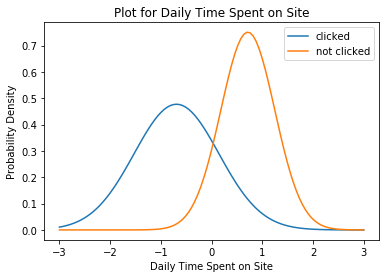

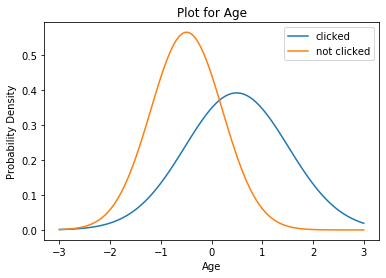

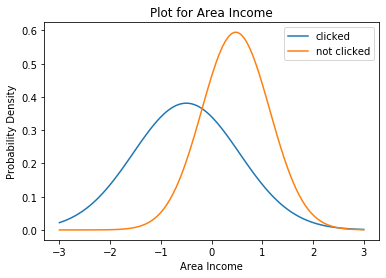

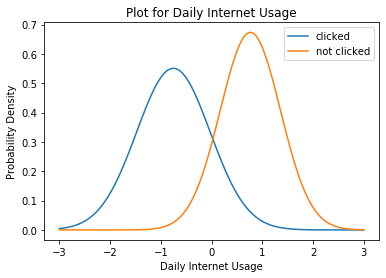

In [20]:
from scipy.stats import norm
import matplotlib.pyplot as plt

x = np.linspace(-3, +3, 100)
for feature in columns:
    plt.plot(x, norm.pdf(x, clickedMean[feature], clickedStd[feature]), label="clicked")
    plt.plot(x, norm.pdf(x, notClickedMean[feature], notClickedStd[feature]), label="not clicked")
    
    plt.title("Plot for " + feature)
    plt.legend()
    plt.xlabel(feature)
    plt.ylabel("Probability Density")
    plt.show()

اگر ویژگی‌ای انتخاب کنیم که به ازای هر عدد احتمال فقط یکی از کلاس‌ها زیاد باشد، بهترین گزینه را انتخاب کردیم. در دو نمودار وسط، برخورد دو نمودار به شدت زیاد است و برای عدد‌هایی که در این برخورد هستند نمی‌توان به طور دقیق کلاسی را تعیین کرد.

برای دو نمودار اولی و آخری هم از آن‌جایی که میانگین‌شان تقریبا یکی است و در آخری انحراف معیار کم‌تر است، پس ناحیه‌ی برخورد کم‌تر است و احتمال داشتن عددی که ندانیم در کدام کلاس قرار می‌گیرد کم‌تر است.

پس جواب:

### Daily Internet Usage

## قسمت یازدهم

### هدف این قسمت
با توجه به قسمت قبلی، به بررسی داده‌های بدون جواب می‌پردازیم و جواب‌های به دست آمده را در فایلی با اندیس سطرهای متناظرشان می‌نویسیم.

In [21]:
feature = 'Daily Internet Usage'
answerList = []
for i in range(len(df)):
    if df.iloc[[i]]['Clicked on Ad'].isna().array[0] == True:
        clickedProb = norm.pdf(df.iloc[[i]][feature], clickedMean[feature], clickedStd[feature])
        notClickedProb = norm.pdf(df.iloc[[i]][feature], notClickedMean[feature], notClickedStd[feature])
        if clickedProb <= notClickedProb:
            answerList.append({'Index': i, 'Clicked': 0})
        else:
            answerList.append({'Index': i, 'Clicked': 1})
            
answerData = pd.DataFrame(answerList)
answerData.head()

,Index,Clicked
0,10,1
1,14,1
2,15,1
3,20,0
4,24,1


In [22]:
answerData.to_csv("Answer.csv", index=False)

# ارائه‌ی راهکار برای توسعه و بهبود پروژه
ما در این پروژه تنها از یک ویژگی برای پیش‌بینی هدف استفاده کردیم. همان‌طور که در نمودارها مشخص بود، در حوالی ۰ این ویژگی خیلی خوب کار نمی‌کند و ممکن است خطا داشته باشیم. برای بهبود این پیش‌بینی می‌توان به جای استفاده از یک ستون، در حالت نامطمئن از ستون‌های دیگر نیز استفاده کرد.